# Welcome to the platemotion package

[![PyPI version shields.io](https://img.shields.io/pypi/v/platemotion.svg)](https://pypi.python.org/pypi/platemotion/) [![PyPI pyversions](https://img.shields.io/pypi/pyversions/platemotion.svg)](https://pypi.python.org/pypi/platemotion/) [![PyPI status](https://img.shields.io/pypi/status/platemotion.svg)](https://pypi.python.org/pypi/platemotion/) [![GitHub contributors](https://img.shields.io/github/contributors/lcx366/PlateTectonic.svg)](https://GitHub.com/lcx366/PlateTectonic/graphs/contributors/) [![Maintenance](https://img.shields.io/badge/Maintained%3F-yes-green.svg)](https://GitHub.com/lcx366/PlateTectonic/graphs/commit-activity) [![GitHub license](https://img.shields.io/github/license/lcx366/PlateTectonic.svg)](https://github.com/lcx366/PlateTectonic/blob/master/LICENSE) [![Documentation Status](https://readthedocs.org/projects/pystmos/badge/?version=latest)](http://PlateTectonic.readthedocs.io/?badge=latest)

The platemotion package is an archive of scientific routines for handling tectonic plate motion. Currently, operations on plate include:

1. Calculate the geometrical and physical properties of plates, such as area, centroid, moment of inertia tensor  
2. Calculate velocities of points given Euler pole parameters
3. Estimate the euler pole based on ITRF2014 velocity field

## How to Install

1. Install **cartopy** from conda by `conda install cartopy`

2. On Linux, macOS and Windows architectures, the binary wheels can be installed using **pip** by executing one of the following commands:

```
pip install platemotion
pip install platemotion --upgrade # to upgrade a pre-existing installation
```

## How to use

### Initialize a plate

In [1]:
from platemotion import Plate
# define a tectonic plate from a spherical polygon file
plate_an = Plate.from_file('platemotion/data/NnrMRVL_PltBndsLatLon/an',skiprows=1) 

### Set Euler pole

In [2]:
from astropy import units as u

#omega = np.array([-0.0914,-0.5283,0.7547])*u.mas/u.yr
#plate_an.set_omega(omega,'cartesian')

omega = [59.4*u.deg,236.5*u.deg,0.23*u.deg/u.Ma]
plate_an.set_omega(omega,'spherical')
#plate_an.set_name('Antarctica')

Calculate the area of the spherical polygon over the Earth with an averaged radius of 6371km.

In [3]:
from pprint import pprint
pprint(plate_an.info)

{'H_cartesian': <Quantity [-6.27283273e+26, -8.49556792e+26,  5.41130833e+26] kg km2 / Ma>,
 'H_spherical': (<Latitude 27.13117643 deg>,
                 <Longitude 233.55912584 deg>,
                 <Quantity 1.18661435e+27 kg km2 / Ma>),
 'area': <Quantity 58149691.98644825 km2>,
 'centroid': (<Quantity -83.61081032 deg>,
              <Quantity 57.80052887 deg>,
              <Quantity 880.96785844 km>),
 'compactness': 0.39900007941415533,
 'density': <Quantity 3.1 g / cm3>,
 'inertia': <Quantity [ 6.77582676e+29,  5.99961382e+29,  1.85826885e+29,
           -2.60236951e+28,  2.67935794e+28,  4.15067565e+28] kg km2>,
 'inertia_mag': <Quantity 9.27275284e+29 kg km2>,
 'inertia_tensor': <Quantity [[ 6.77582676e+29, -2.60236951e+28,  2.67935794e+28],
           [-2.60236951e+28,  5.99961382e+29,  4.15067565e+28],
           [ 2.67935794e+28,  4.15067565e+28,  1.85826885e+29]] kg km2>,
 'omega_cartesian': <Quantity [-0.06462052, -0.09763096,  0.19797067] deg / Ma>,
 'omega_spherical':

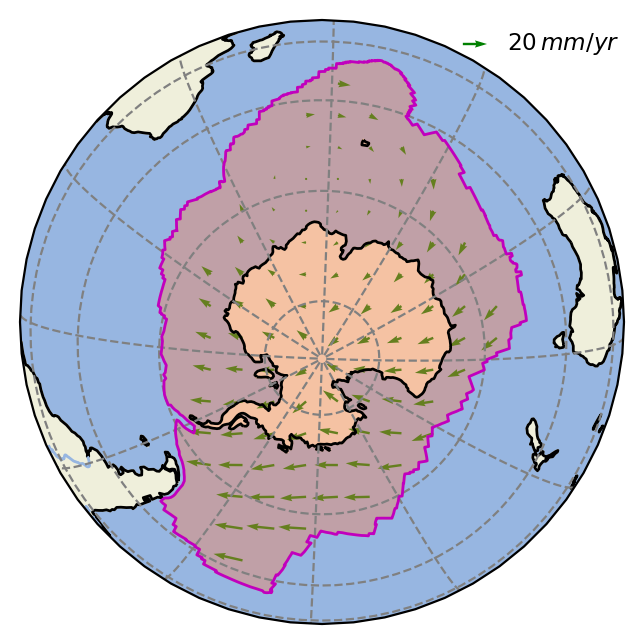

In [10]:
plate_an.plot()

### Calculate velocities of points

In [4]:
location = [-60*u.deg,-90*u.deg,0*u.m]
v = plate_an.velocity_at(location,'geodetic')
pprint(v.info)

{'azimuth': <Quantity 70.63835275 deg>,
 'en': <Quantity [20.41947555,  7.17547259] mm / yr>,
 'speed': <Quantity 21.64352994 mm / yr>,
 'xyz': <Quantity [20.41947555, -6.20366278,  3.60582514] mm / yr>}


In [5]:
locations = [[-45,69]*u.deg,[-67,80]*u.deg,[200,500]*u.m]
v = plate_an.velocity_at(locations,'geodetic')
pprint(v.info)

{'azimuth': <Quantity [ 62.30457157, 105.22683355] deg>,
 'en': <Quantity [[20.67102344, 10.85042608],
           [19.0385182 , -5.1822267 ]] mm / yr>,
 'speed': <Quantity [23.34572673, 19.73121001] mm / yr>,
 'xyz': <Quantity [[ 22.01554216,   1.03807964,   7.6981329 ],
           [-17.90989462,   8.06639686,  -1.86803771]] mm / yr>}


### Plate Motion Model

Currently, only *NNR-MORVEL56* and *GSRMv2.1* are avaliable.

#### NNR-MORVEL56

In [6]:
from platemotion import PlateMotion

nnr_model = PlateMotion.loadmodel('NNR-MORVEL56') # GSRMv2.1
nnr_model_summmary = nnr_model.summary

Loading plates from NNR-MORVEL56: 100%|##########| 56/56 [03:04<00:00,  3.30s/it]


In [11]:
nnr_model_summmary

,Plate,Ab,ωx,ωy,ωz,Lat.(°N),Lon.(°E),ω(°/Ma),Hx,Hy,...,Q12,Q13,Q23,‖Q‖F(10^27 km^2 kg),Area(km^2),Perimeter(km),Compactness,Lat.(°N).2,Lon.(°E).2,Depth(km)
0,Amur,am,-0.073,-0.113,0.265,63.17,237.18,0.297,-13.153,-229.643,...,14.674,18.550,-26.198,93.227,5.303403e+06,10623.85,0.58,46.14,125.62,79.07
1,Antarctica,an,-0.049,-0.092,0.227,65.42,241.89,0.250,-431.464,-773.526,...,-26.024,26.794,41.507,927.275,5.814969e+07,40281.71,0.40,-83.61,57.80,880.97
2,Arabia,ar,0.364,-0.054,0.421,48.88,351.51,0.559,153.309,-306.945,...,-24.914,-15.093,-15.853,86.263,4.904200e+06,10634.77,0.54,23.68,47.06,75.05
3,Australia,au,0.414,0.323,0.352,33.86,37.94,0.632,2167.411,3190.055,...,114.401,-110.930,123.123,615.306,3.739861e+07,29918.84,0.49,-31.50,132.34,577.37
4,Capricorn,cp,0.399,0.170,0.426,44.44,23.09,0.608,694.008,129.685,...,-11.050,3.668,23.291,144.348,8.265942e+06,13287.27,0.58,-14.30,82.93,123.16
5,Caribbean,ca,-0.011,-0.233,0.165,35.20,267.38,0.286,-51.417,-1.557,...,9.196,-2.662,8.713,52.144,2.964782e+06,8998.46,0.46,15.03,286.85,76.10
6,Cocos,co,-0.602,-0.882,0.543,26.93,235.69,1.198,-332.681,55.068,...,-2.831,0.543,5.180,51.788,2.931807e+06,8083.46,0.56,8.37,265.35,47.43
7,Eurasia,eu,-0.042,-0.141,0.168,48.85,253.50,0.223,-648.252,-1573.417,...,-18.161,-108.899,-158.461,781.347,4.855785e+07,41567.75,0.32,59.05,58.30,789.50
8,India,in,0.346,-0.020,0.419,50.37,356.71,0.544,845.422,-409.581,...,-29.136,-6.688,-30.894,215.867,1.243504e+07,17113.95,0.52,12.98,77.49,162.86
9,Juan de Fuca,jf,0.373,0.647,-0.590,-38.31,60.04,0.951,-1.570,7.031,...,-0.767,0.978,1.272,4.556,2.563227e+05,3312.65,0.29,45.43,232.47,7.96


### Build a Plate Motion Model based on ITRF2014 velocity field

In [7]:
from platemotion import ITRF_PlateMotion
# use NNR-MORVEL56 plate boundaries
platemodel = ITRF_PlateMotion('NNR-MORVEL56')

Screen out sites with an observation time of more than 3 years ... Finished
Eliminate sites with velocity uncertainty greater than 1mm/yr ... Finished
Eliminate sites affected by the post-earthquake deformation ... Finished
Exclude sites with the second invariant strain rate greater than 1e-10 based on gsrmv2.1 ... Finished
Exclude sites with the vertical displacement rate greater than 0.75mm/yr based on ICE-6G_D(VM5a) ... Finished
Assign sites to plates ... Finished
Estimating Euler Pole ... Finished


In [8]:
pprint(platemodel.eu.epr)

{'num_sites': 136,
 'omega_cartesian': <Quantity [-0.02592416, -0.14672679,  0.20901511] deg / Ma>,
 'omega_cartesian_std': <Quantity [8.49222294e-05, 3.32043179e-05, 1.05751362e-04] deg / Ma>,
 'omega_spherical': (<Latitude 54.51629211 deg>,
                     <Longitude 259.98020722 deg>,
                     <Quantity 0.25668683 deg / Myr>),
 'omega_spherical_std': (<Quantity 0.01517495 deg>,
                         <Quantity 0.03223431 deg>,
                         <Quantity 8.85943626e-05 deg / Myr>),
 'rms': <Quantity [0.33554098, 0.32477936] mm / yr>}


In [9]:
platemodel.eu.sites

,CODE,PT,DOMES,STATION DESCRIPTION,Geod. Lat. °N,Lat. °N,Lon. °E,H,SOLN,REF_EPOCH,...,STAX_STD,STAY_STD,STAZ_STD,VELX_STD,VELY_STD,VELZ_STD,ve,vn,ve_res,vn_res
0,AJAC,A,10077M005,"Ajaccio, France",41.927444,41.736196,8.762611,98.8,2,10:001:00000,...,0.59986E-03,0.58068E-03,0.53876E-03,0.34092E-04,0.37461E-04,0.34696E-04,0.021088,0.016058,1.936000e-04,0.000373
1,AMBL,A,19967M001,"Ambrumesnil, FR",49.859361,49.669592,0.994306,129.9,1,10:001:00000,...,0.58646E-03,0.56964E-03,0.55445E-03,0.63379E-04,0.41625E-04,0.68454E-04,0.017454,0.015939,-1.016939e-06,-0.000324
2,ARGI,A,10117M002,"Argir, Tórshavn, Faro",61.997361,61.837525,353.216472,110.2,1,10:001:00000,...,0.56975E-03,0.55433E-03,0.61036E-03,0.67557E-04,0.47148E-04,0.10893E-03,0.011754,0.017084,-4.035166e-05,0.000543
3,ARTU,A,12362M001,ARTU 12362M001,56.429806,56.252264,58.560444,247.6,1,10:001:00000,...,0.56576E-03,0.58116E-03,0.54879E-03,0.32262E-04,0.34318E-04,0.32609E-04,0.025272,0.006188,-4.640728e-04,0.000138
4,BEA2,A,10079S001,"Port-Vendres, France",42.515306,42.323661,3.136694,108.2,1,10:001:00000,...,0.65645E-03,0.58472E-03,0.58795E-03,0.15452E-03,0.63419E-04,0.13409E-03,0.020631,0.015778,9.087333e-04,-0.000355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,WTZZ,A,14201M014,WTZZ 14201M014,49.144194,48.953689,12.878889,665.9,3,10:001:00000,...,0.58338E-03,0.57389E-03,0.54538E-03,0.30691E-04,0.36384E-04,0.32602E-04,0.020297,0.015552,1.736272e-04,0.000290
132,YEBE,A,13420M001,YEBE 13420M001,40.524889,40.334908,356.911361,972.8,1,10:001:00000,...,0.59871E-03,0.57837E-03,0.53645E-03,0.31429E-04,0.37409E-04,0.33017E-04,0.018894,0.016412,-1.166159e-04,-0.000035
133,ZEEB,A,13174M001,"Zeebrugge, Belgium",51.335833,51.147958,3.208222,60.3,2,10:001:00000,...,0.58028E-03,0.56775E-03,0.55188E-03,0.35170E-04,0.36910E-04,0.38767E-04,0.017532,0.015357,-4.851948e-07,-0.000772
134,ZWE2,A,12330M003,ZWE2 12330M003,55.699278,55.519899,36.758389,208.2,2,10:001:00000,...,0.56790E-03,0.57494E-03,0.55162E-03,0.33546E-04,0.36547E-04,0.39024E-04,0.022651,0.011871,-4.586815e-04,0.000525


### Change log

- **0.1.0 — Mar 8,  2021**
  - The first release 

## Reference

Argus, Donald F., Richard G. Gordon, and Charles DeMets. "Geologically current motion of 56 plates relative to the no‐net‐rotation reference frame." Geochemistry, Geophysics, Geosystems 12.11 (2011).

Kreemer, Corné, Geoffrey Blewitt, and Elliot C. Klein. "A geodetic plate motion and Global Strain Rate Model." Geochemistry, Geophysics, Geosystems 15.10 (2014): 3849-3889.

Altamimi, Zuheir, et al. "ITRF2014: A new release of the International Terrestrial Reference Frame modeling nonlinear station motions." Journal of Geophysical Research: Solid Earth 121.8 (2016): 6109-6131.